# Data Mining - Sommersemester 2024
Diren Can Akkaya - s0588821
Vanja Milanovic - s0588888
## Rossmann Sales Prediction
## Gliederung
1. Aufgabenbeschreibung
2. Laden der Daten
3. Deskritive Analyse der Daten
4. Zusammenführen der Datensätze
5. Feature Engineering
6. Messung der Güte der Modelle
7. Auswahl der Modelle
8. Features und Zielvariable
9. Decision Tree Regression
10. Optimieren der Hyperparameter
11. Random Forest Regression
12. Zusammenfassung


## 1. Aufgabenbeschreibung
Im Rahmen unseres semesterbegleitenden Projekts besteht unsere Aufgabe darin, die Verkaufszahlen der Drogeriekette Rossmann vorherzusagen. Rossmann betreibt über 3000 Filialen in sieben europäischen Ländern und steht vor der Herausforderung, tägliche Verkaufszahlen bis zu sechs Wochen im Voraus zu prognostizieren. Diese Aufgabe, die derzeit von den einzelnen Filialleitern übernommen wird, wird von zahlreichen Faktoren beeinflusst, darunter Werbeaktionen, Konkurrenz, Schul- und Feiertage, Saisonalität und die spezifischen Gegebenheiten der jeweiligen Region. Angesichts der unterschiedlichen Bedingungen und subjektiven Ansätze der vielen Filialleiter variiert die Genauigkeit dieser Verkaufsprognosen erheblich.

Unser Projekt zielt darauf ab, die Verkaufszahlen für 1115 Filialen in ganz Deutschland vorherzusagen. Um dies zu erreichen werden wir geeignete Modelle auswählen, darunter Regressionsmodelle, Klassifikationsmodelle und Clustering-Ansätze. Die Validierung der ausgewählten Modelle wird ein wesentlicher Bestandteil unseres Projekts sein, um sicherzustellen, dass die Vorhersagen zuverlässig und möglichst genau sind. Darüber hinaus werden wir wichtige Parameter identifizieren, die die Verkaufszahlen beeinflussen, und diese in unsere Vorhersagemodelle integrieren. 

## 2. Laden der Daten
In diesem Abschnitt werden wir die notwendigen Bibliotheken importieren und die Datensätze laden, die wir für unser Projekt benötigen. Die Datensätze umfassen die folgenden Dateien:

In [78]:
#importieren der Bibliotheken
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [79]:
#Laden der Datensätze
train_df = pd.read_csv("resources/train.csv")
test_df = pd.read_csv("resources/test.csv")
store_df = pd.read_csv("resources/store.csv")

/var/folders/11/_wgl3_zd1j592z9cz4058vmh0000gn/T/ipykernel_3386/3675560344.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("resources/train.csv")


## 3. Deskriptive Analyse der Daten
Im deskriptiven Teil unseres Projekts werden wir zunächst eine detaillierte Analyse der vorhandenen Verkaufsdaten von Rossmann durchführen. Dies umfasst die Untersuchung von Mustern und Trends in den Verkaufszahlen, die Identifizierung von saisonalen Schwankungen sowie die Analyse von Einflüssen durch Werbeaktionen, Feiertage und regionale Unterschiede. Diese deskriptive Analyse bildet die Grundlage für ein besseres Verständnis der Datenstruktur und der relevanten Einflussfaktoren, die später in die Modellierung der Verkaufsprognosen einfließen werden.

In [80]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Der Datensatz train_df enthält Verkaufsdaten der Drogeriekette Rossmann. Die Merkmale sind:
- Store: eindeutige ID der Filiale
- DayOfWeek: Der Wochentag (1 = Montag, 2 = Dienstag, ..., 7 = Sonntag)
- Date: Datum des Verkaufstages
- Sales: Verkaufszahlen der Filiale an diesem Tag
- Open: Gibt an ob die Filiale an diesem Tag geöffnet war (1) oder geschlossen (0)
- Customers: Anzahl der Kunden, die die Filiale an diesem Tag besucht haben
- Promo: Gibt an, ob an diesem Tag eine Werbeaktion stattgefunden hat (1) oder nicht (0)
- StateHoliday: Gibt an ob an diesem Tag ein staatlicher Feiertag war (a = public Holiday, b = Ostern, c = Weihnachten, 0 = kein Feiertag)
- SchoolHoliday: Gibt an ob an diesem Tag Schulferien waren (1) oder nicht (0) 

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
train_df.shape

(1017209, 9)

Der Datensatz train_df enthält 1017209 Zeilen und 9 Spalten (Merkmale).
Nun überprüfen wir ob der Datensatz fehlende Werte enthält.

In [6]:
#Fehlende Daten identifizieren
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Der Datensatz train_df enthält keine fehlenden Werte.
Nun überprüfen wir welche Zeitspanne die Verkaufsdaten abdecken.

In [7]:
print(train_df['Date'].min())
print(train_df['Date'].max())

2013-01-01
2015-07-31


Die Verkaufsdaten von Rossmann erstrecken sich über einen Zeitraum vom 31.01.2013 bis zum 31.07.2015.
Nun schauen wir uns das Merkmal StateHoliday genauer an.

In [8]:
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Das Merkmal StateHoliday enthält zweimal die Kategorie 0. Einmal als String und einmal als numerischen Wert. Im Folgenden werden wir dies korrigieren und gleichzeitig die Kategorien a, b und c in 1 umwandeln, sodass wir nur noch zwei Kategorien haben (0 und 1).

In [9]:
#Unterscheidung zwischen Public Holiday (1) und keine Holidays (0)
train_df['StateHoliday'] = train_df['StateHoliday'].map({'0': 0, 0: 0, 'a': 1, 'b': 1, 'c': 1})
train_df['StateHoliday'].unique()

array([0, 1])

In [10]:
test_df['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [11]:
test_df['StateHoliday'] = test_df['StateHoliday'].map({'0':0, 'a':1})
test_df['StateHoliday'].unique()

array([0, 1])

Schauen wir uns die Verteilung der Sales im train_df Datensatz an.

In [12]:
train_df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [13]:
train_df["Date"] = pd.to_datetime(train_df["Date"], format="%Y-%m-%d")
train_df["Year"] = train_df["Date"].dt.year

### 3.1 Visualisierung der Verkaufsdaten

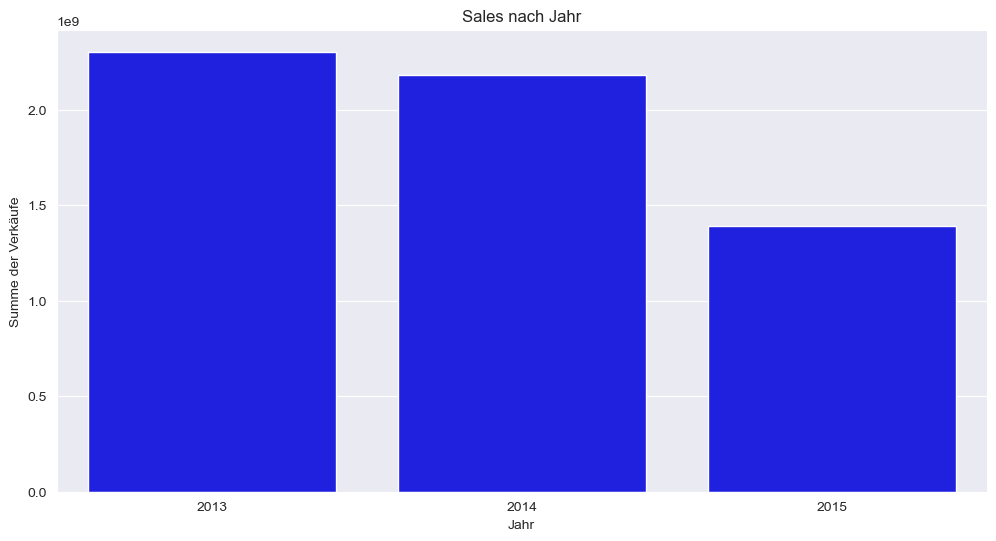

In [14]:
sales_sum = train_df.groupby("Year")["Sales"].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=sales_sum.index , y=sales_sum.values, color="blue")
plt.xlabel("Jahr")
plt.ylabel("Summe der Verkäufe")
plt.title("Sales nach Jahr")
plt.show()

Es ist erkennbar, dass die Verkaufszahlen von Rossmann im Jahr 2013 am höchsten waren und in den folgenden Jahren abgenommen haben. Allerdings muss beachtet werden, dass die Verkaufszahlen (Daten) im Jahr 2015 nur bis zum 31.07.2015 reichen und somit unvollständig sind.

In [15]:
train_df['Year'].value_counts().sort_index()

Year
2013    406974
2014    373855
2015    236380
Name: count, dtype: int64

Nun schauen wir uns die Verkaufszahlen nach den Wochentagen an.

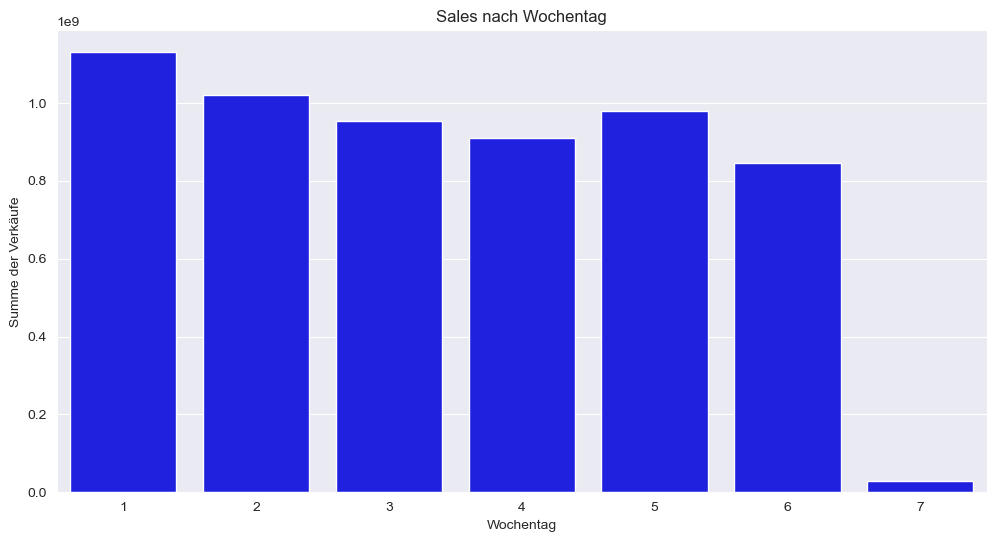

In [16]:
sales_sum = train_df.groupby("DayOfWeek")["Sales"].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=sales_sum.index , y=sales_sum.values, color="blue")
plt.xlabel("Wochentag")
plt.ylabel("Summe der Verkäufe")
plt.title("Sales nach Wochentag")
plt.show()

Die Verkaufszahlen von Rossmann sind an den Wochentagen relativ gleichmäßig verteilt. Die Verkaufszahlen an Sonntagen (7) sind am niedrigsten.

Nun schauen wir uns die Verkäufe nach Werbeaktion (Promo) an.

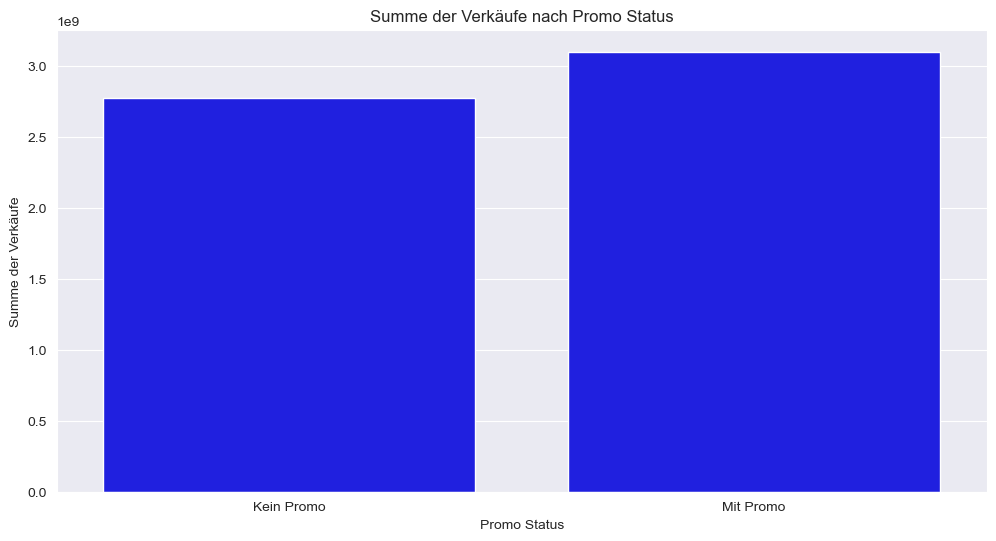

In [17]:
sales_per_promo = train_df.groupby("Promo")["Sales"].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=sales_per_promo.index, y=sales_per_promo.values, color="blue")
plt.xlabel("Promo Status")
plt.ylabel("Summe der Verkäufe")
plt.title("Summe der Verkäufe nach Promo Status")
plt.xticks(ticks=[0,1], labels=["Kein Promo", "Mit Promo"])
plt.show()

Die Verkaufszahlen von Rossmann sind an Tagen mit Werbeaktionen (Promo = 1) höher als an Tagen ohne Werbeaktionen (Promo = 0).

### 3.2 Bereinigung der Daten
Im Folgenden werden wir die Daten bereinigen, um sicherzustellen, dass sie für die Modellierung geeignet sind. 

Zunächst überprüfen wir, ob es doppelte Reihen in den Datensätzen gibt.

In [18]:
#Zählen der doppelten Reihen im Test Datensatz
print("Anzahl der doppelten Reihen: ", test_df.duplicated().sum())

Anzahl der doppelten Reihen:  0


Der Datensatz enthält keine doppelten Reihen.
Nun überprüfen wir ob der Datensatz Anomalien enthält. Dazu zählen wir die Anzahl der Datensätze, an denen die Läden geöffnet waren, aber keine Verkäufe oder Kunden verzeichnet wurden.

In [19]:
#Anzahl der Anomalien überprüfen
open_count = train_df[(train_df["Open"] == 1) & ((train_df["Sales"] == 0) | (train_df["Customers"] == 0))].shape[0]
print(open_count)

54


Der Datensatz enthält 54 Anomalien, bei denen die Läden geöffnet waren, aber keine Verkäufe oder Kunden verzeichnet wurden. Diese Anomalien werden wir nun entfernen.

In [20]:
#Löschen der Anomalien
train_df = train_df.drop(train_df[(train_df["Open"] == 1) & ((train_df["Sales"] == 0) | (train_df["Customers"] == 0))].index)

Wir entfernen nun alle Daten an denen die Läden geschlossen waren. Wir vermuten, ausgehend vom Notebook von Elena ([Elena]. ([19.07.2017]). [train.csv]. [Rossmann Store Sales 2024]), dass die geschlossenen Stores unseren Modellen keinen Mehrwert bieten bzw. sogar das Ergebnis verzerren könnten. Dementsprechend entfernen wir alle geschlossenen Stores aus dem Datensatz.

In [21]:
train_df[train_df["Open"] == 0].shape[0]

172817

In [22]:
#Löschen der Datensätze
train_df = train_df.drop(train_df[train_df["Open"] == 0].index)
train_df[train_df["Open"] == 0].shape[0]

0

### Store Datensatz
Bevor wir die train.csv und die store.csv zusammenführen, schauen wir uns den store.csv Datensatz genauer an.

In [23]:
store_df.shape

(1115, 10)

Der store.csv Datensatz enthält 1115 Zeilen und 10 Spalten (Merkmale).

In [24]:
store_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Die Merkmale des store.csv Datensatzes sind:
- Store: eindeutige ID der Filiale
- StoreType: Typ der Filiale (a,b,c,d)
- Assortment: Sortiment der Filiale (a,b,c)
- CompetitionDistance: Distanz zum nächsten Wettbewerber in Metern
- CompetitionOpenSince(Month/Year): Monat (Jahr), seit dem der Wettbewerber geöffnet hat
- Promo2: Promo2 ist eine fortlaufende und sich wiederholende Promotion für einige Filialen (0 = Promo2 ist inaktiv, 1 = Promo2 ist aktiv)
- Promo2Since(Week/Year): Kalenderwoche (Jahr), seit dem Promo2 aktiv ist
- PromoInterval: Zeitintervall, in dem Promo2 aktiv ist

Nun überprüfen wir ob der store.csv Datensatz fehlende Werte enthält.

In [25]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Die Merkmale CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear und PromoInterval enthalten fehlende Werte.

Die fehlenden Werte werden durch Imputation mit dem Median ersetzt.
Eine grundlegende Strategie zur Verwendung unvollständiger Datensätze besteht darin, ganze Zeilen und/oder Spalten mit fehlenden Werten zu verwerfen. Dies geht jedoch auf Kosten des Verlusts potenziell wertvoller Daten (auch wenn diese unvollständig sind). Eine bessere Strategie besteht darin, die fehlenden Werte zu imputieren, d.h. sie aus dem bekannten Teil der Daten zu schätzen. [https://scikit-learn.org/stable/modules/impute.html#]

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
store_df['CompetitionDistance'] = imputer.fit_transform(store_df['CompetitionDistance'].values.reshape(-1,1))
print(store_df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [27]:
store_df["Promo2SinceWeek"] = store_df["Promo2SinceWeek"].fillna(0)
store_df["Promo2SinceYear"] = store_df["Promo2SinceYear"].fillna(0)
store_df["PromoInterval"] = store_df["PromoInterval"].fillna("None")

In [28]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

Ich würde überlegen CompetitionOpenSinceMonth und Year sowohl Promo2SinceWeek und Year als Merkmale zu löschen. Von 1115 Zeilen sind 50% mit Null befüllt und wenn man die mit Werten befüllt würde das zur Verzerrung führen.

In [29]:
store_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

Das Merkmal StoreType enthält vier verschiedene Kategorien (a,b,c,d).

In [30]:
store_df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [31]:
label_encoder = LabelEncoder()

store_df["StoreType"] = label_encoder.fit_transform(store_df["StoreType"])
store_df["Assortment"] = label_encoder.fit_transform(store_df["Assortment"])

In [32]:
#Zusammenführen von train und store
train_merged_df = pd.merge(train_df, store_df, how='left', on='Store')
train_merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,2,0,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,2,2,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,0,0,29910.0,4.0,2015.0,0,0.0,0.0,None


In [33]:
#Doppelte Reihen zählen
print("Anzahl der doppelten Reihen: ", store_df.duplicated().sum())

Anzahl der doppelten Reihen:  0


## Datensätze zusammenführen

In [34]:
test_merged_df = pd.merge(test_df, store_df, how='left', on='Store')
test_merged_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,3,4,2015-09-17,1.0,1,0,0,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,0,2,24000.0,4.0,2013.0,0,0.0,0.0,None
3,4,8,4,2015-09-17,1.0,1,0,0,0,0,7520.0,10.0,2014.0,0,0.0,0.0,None
4,5,9,4,2015-09-17,1.0,1,0,0,0,2,2030.0,8.0,2000.0,0,0.0,0.0,None


### Korrelation 
Im folgenden werden wir die Korrelation zwischen den Features bestimmen.
Eine Korrelationsmatrix hilft uns ein besseres Verständnis über die Features zu erhalten und ggf. redundante Features zu entfernen(bspw. wenn zwei verschiedene Features mit demselben Feature ähnlich korrelieren), um so die Performance unseres Notebooks und der Modelle zu verbessern.

In [35]:
#pearson korr
correlation_matrix = train_merged_df[["Sales","Customers", "CompetitionDistance"]].corr()
correlation_matrix = correlation_matrix.round(4)

print("Pearson-Korrelation zwischen Sales und Customers:")
print(correlation_matrix)

Pearson-Korrelation zwischen Sales und Customers:
                      Sales  Customers  CompetitionDistance
Sales                1.0000     0.8236              -0.0359
Customers            0.8236     1.0000              -0.1479
CompetitionDistance -0.0359    -0.1479               1.0000


Die Korrelation der beiden Features “Sales” und “Customers” ist sehr hoch. Es würde reichen, wenn wir eines dieser Merkmale beibehalten oder aus beiden Features ein neues erstellen.

#### Scatterplot

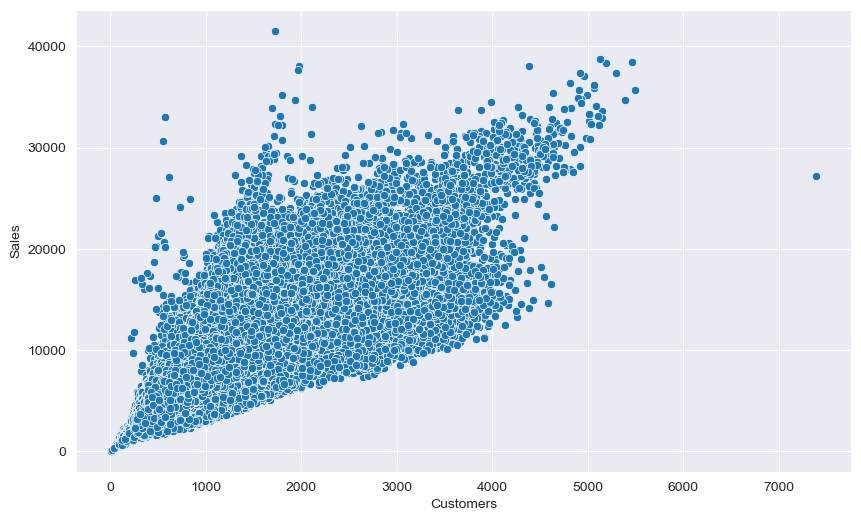

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Customers", y="Sales", data=train_merged_df)
plt.show()

#### Heatmap der Korrelationsmatrix

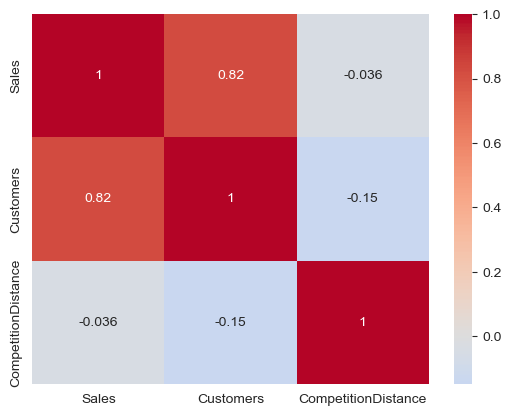

In [37]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

#### Boxplots

Der folgende Boxplot zeigt die Verteilung der Verkaufszahlen über die verschiedenen StoreTypes.

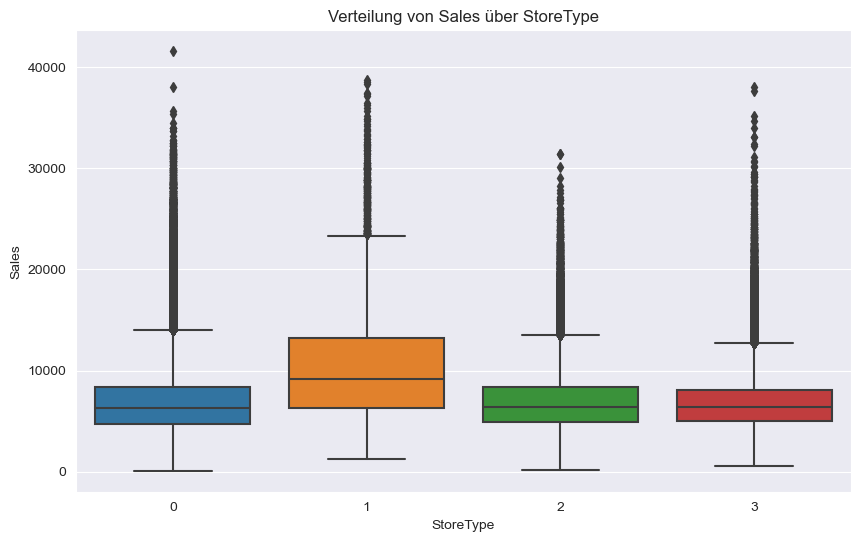

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="StoreType", y="Sales", data=train_merged_df)
plt.title("Verteilung von Sales über StoreType")
plt.show()

Geschäftstyp '1' weist im Vergleich zu den anderen Geschäftstypen im Allgemeinen höhere und variablere Verkaufszahlen auf.

Der folgende Boxplot zeigt die Verteilung der Verkaufszahlen über die verschiedenen Assortments.

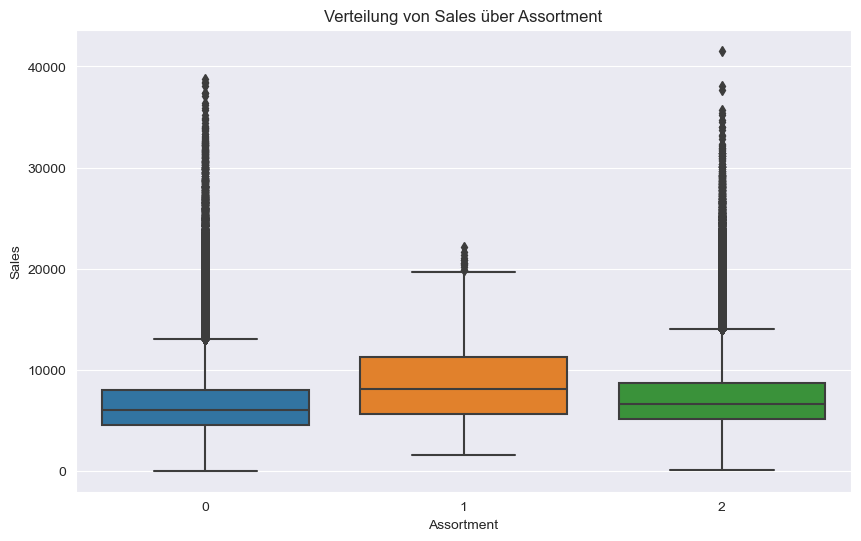

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Assortment", y="Sales", data=train_merged_df)
plt.title("Verteilung von Sales über Assortment")
plt.show()

Assortmenttyp '1' weist im Vergleich zu den anderen Assortmenttypen im Allgemeinen höhere und variablere Verkaufszahlen auf.

## Feature Engineering
Weitere Features dienen dazu genauere Modelle zu trainieren. Dementsprechend werden wir, angelehnt an der Checkliste von (Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow : Concepts, Tools, and Techniques to Build Intelligent Systems, S.758) eine erste Auswahl an Features treffen, die für die Modelle sinnvoll erscheinen und bei unzufriedener Performance iterativ neue Features wählen bzw. Features entfernen.

Wir extrahieren aus der Spalte "Date" die Spalten "Day", "Month" und "Year", um so ggf. saisonale Muster zu erkennen.

In [44]:
train_merged_df['Year'] = pd.to_datetime(train_merged_df['Date']).dt.year
train_merged_df['Month'] = pd.to_datetime(train_merged_df['Date']).dt.month
train_merged_df['Day'] = pd.to_datetime(train_merged_df['Date']).dt.day

test_merged_df['Year'] = pd.to_datetime(test_merged_df['Date']).dt.year
test_merged_df['Month'] = pd.to_datetime(test_merged_df['Date']).dt.month
test_merged_df['Day'] = pd.to_datetime(test_merged_df['Date']).dt.day

Wir fügen ein neues Featur Promo2Active hinzu, welches angibt ob eine Werbeaktion aktiv ist oder nicht.

In [45]:
#dict für Monatsnamen auf Zahlen
month_map = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
             "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}


# Promo2Active berechnen
def is_promo2_active(row):
    if row["Promo2"] == 1:
        # Wandelt die Monatsnamen in Zahlen um und überprüft, ob der aktuelle Monat in PromoInterval enthalten ist
        promo_months = [month_map[m] for m in row["PromoInterval"].split(",") if m in month_map]
        if row["Month"] in promo_months:
            return 1
    return 0

train_merged_df['Promo2Active'] = train_merged_df.apply(is_promo2_active, axis=1)
train_merged_df.insert(18, "Promo2Active", train_merged_df.pop("Promo2Active"))

test_merged_df['Promo2Active'] = test_merged_df.apply(is_promo2_active, axis=1)
test_merged_df.insert(18, "Promo2Active", test_merged_df.pop("Promo2Active"))

In [46]:
train_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Promo2Active,PromoInterval,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,0,None,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,570.0,11.0,2007.0,1,13.0,2010.0,1,"Jan,Apr,Jul,Oct",7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,14130.0,12.0,2006.0,1,14.0,2011.0,1,"Jan,Apr,Jul,Oct",7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,620.0,9.0,2009.0,0,0.0,0.0,0,None,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,29910.0,4.0,2015.0,0,0.0,0.0,0,None,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,2013-01-01,3375,566,1,0,1,1,2013,...,150.0,9.0,2006.0,0,0.0,0.0,0,None,1,1
844334,733,2,2013-01-01,10765,2377,1,0,1,1,2013,...,860.0,10.0,1999.0,0,0.0,0.0,0,None,1,1
844335,769,2,2013-01-01,5035,1248,1,0,1,1,2013,...,840.0,NaN,NaN,1,48.0,2012.0,1,"Jan,Apr,Jul,Oct",1,1
844336,948,2,2013-01-01,4491,1039,1,0,1,1,2013,...,1430.0,NaN,NaN,0,0.0,0.0,0,None,1,1


Wir löschen Promo2 und PromoInterval.

In [47]:
#Wir entfernen Promo2 und PromoInterval
train_merged_df = train_merged_df.drop(columns=['Promo2', 'PromoInterval'])
test_merged_df = test_merged_df.drop(columns=['Promo2', 'PromoInterval'])
train_merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Promo2Active,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,2,0,1270.0,9.0,2008.0,0.0,0.0,0,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,0,0,570.0,11.0,2007.0,13.0,2010.0,1,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,0,0,14130.0,12.0,2006.0,14.0,2011.0,1,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,2,2,620.0,9.0,2009.0,0.0,0.0,0,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,0,0,29910.0,4.0,2015.0,0.0,0.0,0,7,31


Wir fügen das Feature "CompetitionOpenSince" hinzu. Dieses Feature gibt an, seit wie vielen Jahren die Konkurrenz geöffnet hat.

In [48]:
#Hinzufügen von CompetitionOpenSince
train_merged_df['CompetitionOpenSinceYears'] = train_merged_df['Year'] - train_merged_df['CompetitionOpenSinceYear']
train_merged_df.insert(15, "CompetitionOpenSinceYears", train_merged_df.pop("CompetitionOpenSinceYears"))
train_merged_df["CompetitionOpenSinceYears"].fillna(0, inplace=True) 
#Die nAn die dabei entstehen ersetzen wir mi 0

test_merged_df['CompetitionOpenSinceYears'] = test_merged_df['Year'] - test_merged_df['CompetitionOpenSinceYear']
test_merged_df.insert(15, "CompetitionOpenSinceYears", test_merged_df.pop("CompetitionOpenSinceYears"))
test_merged_df["CompetitionOpenSinceYears"].fillna(0, inplace=True)

In [49]:
#Wir entfernen die Features CompetitionOpenSinceYear und CompetitionOpenSinceMonth
train_merged_df = train_merged_df.drop(columns = ['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'])

test_merged_df = test_merged_df.drop(columns = ['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'])


In [50]:
#Wir entfernen des Weiteren auch noch die Spalte Customers und Date
train_merged_df = train_merged_df.drop(columns = ['Date', 'Customers'])
test_merged_df = test_merged_df.drop(columns = ['Date'])
train_merged_df

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYears,Promo2SinceWeek,Promo2SinceYear,Promo2Active,Month,Day
0,1,5,5263,1,1,0,1,2015,2,0,1270.0,7.0,0.0,0.0,0,7,31
1,2,5,6064,1,1,0,1,2015,0,0,570.0,8.0,13.0,2010.0,1,7,31
2,3,5,8314,1,1,0,1,2015,0,0,14130.0,9.0,14.0,2011.0,1,7,31
3,4,5,13995,1,1,0,1,2015,2,2,620.0,6.0,0.0,0.0,0,7,31
4,5,5,4822,1,1,0,1,2015,0,0,29910.0,0.0,0.0,0.0,0,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,1,0,1,1,2013,1,0,150.0,7.0,0.0,0.0,0,1,1
844334,733,2,10765,1,0,1,1,2013,1,1,860.0,14.0,0.0,0.0,0,1,1
844335,769,2,5035,1,0,1,1,2013,1,1,840.0,0.0,48.0,2012.0,1,1,1
844336,948,2,4491,1,0,1,1,2013,1,1,1430.0,0.0,0.0,0.0,0,1,1


In [51]:
test_merged_df

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2SinceWeek,Promo2SinceYear,CompetitionOpenSinceYears,Year,Promo2Active,Month,Day
0,1,1,4,1.0,1,0,0,2,0,1270.0,0.0,0.0,7.0,2015,0,9,17
1,2,3,4,1.0,1,0,0,0,0,14130.0,14.0,2011.0,9.0,2015,0,9,17
2,3,7,4,1.0,1,0,0,0,2,24000.0,0.0,0.0,2.0,2015,0,9,17
3,4,8,4,1.0,1,0,0,0,0,7520.0,0.0,0.0,1.0,2015,0,9,17
4,5,9,4,1.0,1,0,0,0,2,2030.0,0.0,0.0,15.0,2015,0,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,1.0,0,0,0,0,0,1900.0,31.0,2013.0,1.0,2015,0,8,1
41084,41085,1112,6,1.0,0,0,0,2,2,1880.0,0.0,0.0,9.0,2015,0,8,1
41085,41086,1113,6,1.0,0,0,0,0,2,9260.0,0.0,0.0,0.0,2015,0,8,1
41086,41087,1114,6,1.0,0,0,0,0,2,870.0,0.0,0.0,0.0,2015,0,8,1


In [52]:
#Encoding der Kategorischen Variablen
categorical_features = ['StateHoliday', 'SchoolHoliday','StoreType', 'Assortment']
#Encoden der kategorischen Merkmale
train_merged_df = pd.get_dummies(train_merged_df, columns=categorical_features)
test_merged_df = pd.get_dummies(test_merged_df, columns=categorical_features)


In [53]:
for col in train_merged_df.select_dtypes(include=['bool']).columns:
    train_merged_df[col] = train_merged_df[col].astype(int)
train_merged_df

,Store,DayOfWeek,Sales,Open,Promo,Year,CompetitionDistance,CompetitionOpenSinceYears,Promo2SinceWeek,Promo2SinceYear,...,StateHoliday_1,SchoolHoliday_0,SchoolHoliday_1,StoreType_0,StoreType_1,StoreType_2,StoreType_3,Assortment_0,Assortment_1,Assortment_2
0,1,5,5263,1,1,2015,1270.0,7.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
1,2,5,6064,1,1,2015,570.0,8.0,13.0,2010.0,...,0,0,1,1,0,0,0,1,0,0
2,3,5,8314,1,1,2015,14130.0,9.0,14.0,2011.0,...,0,0,1,1,0,0,0,1,0,0
3,4,5,13995,1,1,2015,620.0,6.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,1
4,5,5,4822,1,1,2015,29910.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,1,0,2013,150.0,7.0,0.0,0.0,...,1,0,1,0,1,0,0,1,0,0
844334,733,2,10765,1,0,2013,860.0,14.0,0.0,0.0,...,1,0,1,0,1,0,0,0,1,0
844335,769,2,5035,1,0,2013,840.0,0.0,48.0,2012.0,...,1,0,1,0,1,0,0,0,1,0
844336,948,2,4491,1,0,2013,1430.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,1,0


In [54]:
for col in test_merged_df.select_dtypes(include=['bool']).columns:
    test_merged_df[col] = test_merged_df[col].astype(int)
test_merged_df

,Id,Store,DayOfWeek,Open,Promo,CompetitionDistance,Promo2SinceWeek,Promo2SinceYear,CompetitionOpenSinceYears,Year,...,StateHoliday_1,SchoolHoliday_0,SchoolHoliday_1,StoreType_0,StoreType_1,StoreType_2,StoreType_3,Assortment_0,Assortment_1,Assortment_2
0,1,1,4,1.0,1,1270.0,0.0,0.0,7.0,2015,...,0,1,0,0,0,1,0,1,0,0
1,2,3,4,1.0,1,14130.0,14.0,2011.0,9.0,2015,...,0,1,0,1,0,0,0,1,0,0
2,3,7,4,1.0,1,24000.0,0.0,0.0,2.0,2015,...,0,1,0,1,0,0,0,0,0,1
3,4,8,4,1.0,1,7520.0,0.0,0.0,1.0,2015,...,0,1,0,1,0,0,0,1,0,0
4,5,9,4,1.0,1,2030.0,0.0,0.0,15.0,2015,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,1.0,0,1900.0,31.0,2013.0,1.0,2015,...,0,1,0,1,0,0,0,1,0,0
41084,41085,1112,6,1.0,0,1880.0,0.0,0.0,9.0,2015,...,0,1,0,0,0,1,0,0,0,1
41085,41086,1113,6,1.0,0,9260.0,0.0,0.0,0.0,2015,...,0,1,0,1,0,0,0,0,0,1
41086,41087,1114,6,1.0,0,870.0,0.0,0.0,0.0,2015,...,0,1,0,1,0,0,0,0,0,1


Bevor wir die Modelle trainieren, werfen wir noch einmal einen Blick auf die Datensätze (Umfang, Merkmale)

In [83]:
train_merged_df.shape

(844338, 24)

In [82]:
train_merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Open                           int64
Promo                          int64
Year                           int32
CompetitionDistance          float64
CompetitionOpenSinceYears    float64
Promo2SinceWeek              float64
Promo2SinceYear              float64
Promo2Active                   int64
Month                          int32
Day                            int32
StateHoliday_0                 int64
StateHoliday_1                 int64
SchoolHoliday_0                int64
SchoolHoliday_1                int64
StoreType_0                    int64
StoreType_1                    int64
StoreType_2                    int64
StoreType_3                    int64
Assortment_0                   int64
Assortment_1                   int64
Assortment_2                   int64
dtype: object

## Messung der Güte der Modelle
Für die Messung der Güte der Modelle wird für den Rossmann Store Sales Datensatz die Root Mean Square Percentage Error Methode beschrieben.
Der RMSPE ist ein statistisches Maß, das verwendet wird, um die Genauigkeit eines Vorhersagemodells zu bewerten. Bei dem RMSPE handelt es sich um eine skalierte Version des Root Mean Square Error, die es ermöglicht, die Fehler in Prozent auszudrücken, was besonders nützlich ist, wenn die Größenordnung der Daten stark variieren kann. 

Formel Root Mean Square Percentage Error:
$$
\text{RMSPE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left( \frac{y_i - \hat{y}_i}{y_i} \right)^2 }
$$

y_i beschreibt dabei die Sales jedes einzelnen Stores auf täglicher Basis und hat{y}_i beschreibt die Vorhersage. In der Berechnung wird jeder Datensatz an welchem der Wert Sales gleich 0 ist ignoriert.

Schritte zur Berechnung:
1. Für jeden Datenpunkt wird der Fehler als Anteil des tatsächlichen Wertes berechnet
2. Die prozentualen Fehler werden quadriert, dass positive und negative Fehler sich gegenseitig aufheben.
3. Berechnung des Durchschnitts der quadrierten Fehler
4. Ziehen der Quadratwurzel des Durchschnitts um den Fehler auf die ursprüngliche Skala zurückzubringen 

Der Root Mean Square Error (RMSE) ist eine Maßzahl zur Beurteilung der Güte der Vorhersage. Der RMSE misst den durchschnittlichen Abstand der Datenpunkte von der Regressionsgeraden. Somit bietet sich der RMSE bzw. der RMSPE für die Berechnung der Güte des Vorhersagemodells sofern es sich um ein Regressionsmodell handelt. 
Der Ansatz ist nützlich für den Vergleich von Regressionsmodellen um deren Güte zu bestimmen. Allerdings ist das Verfahren empfindlich gegenüber Ausreißern, da die Werte quadriert werden.

Es hängt allerdings auch von der Art des Problems (Regression, Klassifikation oder Clsutering) und den Anforderungen ab. Für Regressionsprobleme existieren neben dem RMSE beispielsweise noch der Mean Absolute/Squared Error oder R-Quadrat. R-Quadrat berechnet dabei den Anteil der Varianz welcher durch das Modell erklärt wird. Mit dem mittleren quadratischem/absoluten Fehler wird der durchschnittliche Fehler zwischen den tatsächlichen und den vorhergesagten Werten berechnet.
Für Klassifikationsmodelle, bei denen die vorhergesagten Werte diskret sind, gibt es Metriken wie:
- Genauigkeit (Accuracy), welche den Anteil der korrekt klassifizierten Instanzen misst
- Präzision (Precision), welche den Anteil der tatsächlich positiven Vorhersagen angibt
- Sensitivität (Recall), welche den Anteil der tatsächlich positiven Instanzen dir korrekt identifiziert wurden misst
- Der F1-Score ist das harmonische Mittel von Präzision und Recall und bietet ein ausgewogenes Maß

In [71]:
#Funktion des RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

## Auswahl der Modelle
In diesem Abschnitt testen wir mehrere Modelle nach dem "quick and dirty"-approach nach https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md
https://scikit-learn.org/stable/modules/tree.html. Basierend auf dem Ergebnis wählen wir unsere beiden Modelle.

Die Funktion ermöglicht uns, schnell und einfach verschiedene Modelle zu vergleichen. Die Daten sampeln wir vorher und können einfach ersetzt werden.
Das Modell der linearen Regression dient für uns als Baselinemodell anhand wir alle weiteren Modelle messen.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#Sample der Daten für schnelles testen und Auswahl der Modelle
df_ml = train_merged_df.sample(frac=0.5, random_state=1) # Den DF nach wunsch austauschen 

#dict für die modelle https://stackoverflow.com/questions/56602214/how-can-i-iterate-over-a-list-of-models-in-python-with-scikit-learn
dict_models = {
    "Linear Regression": linear_model.LinearRegression(), #Vergleichsmodell
    "DTR": tree.DecisionTreeRegressor(),
    "NN Regression": KNeighborsRegressor(),
    "RFR": RandomForestRegressor()
    #"SVM Regression": svm.SVR()
}

#Berechnung des RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))


#Funktion zum schnellen Testen
def quick_model_testing(model, data):
    print(f"Modell:{model}")

    # Zielvariable (Sales)
    target = data["Sales"]
    
    # Features (alle Spalten außer 'Sales')
    X = data.drop(columns=["Sales"])
    
    # Split in Trainings- und Testdaten
    X_train, X_test, target_train, target_test = train_test_split(X, target, 
                                                                  test_size=0.3, random_state=3)
    
    # Modelltraining
    trained_model = model.fit(X_train, target_train)
    
    # Vorhersagen auf dem Testdatensatz
    predictions = trained_model.predict(X_test)
    
    # Bewertung des Modells
    mse = mean_squared_error(target_test, predictions)
    r2 = r2_score(target_test, predictions)
    rmspe_value = rmspe(target_test, predictions)
    
    print(f"Mean Squared Error: {mse}")
    print(f"RMSPE: {rmspe_value}")
    print(f"R² Score: {r2}")
    
    return mse, r2, rmspe_value

Modell:LinearRegression()
Mean Squared Error: 7590830.147346441
RMSPE: 0.6011039322571011
R² Score: 0.2133509011010405
Modell:DecisionTreeRegressor()
Mean Squared Error: 2132062.0584835494
RMSPE: 0.3989144225560445
R² Score: 0.7790512151442296
Modell:KNeighborsRegressor()
Mean Squared Error: 2499740.520341727
RMSPE: 0.5706456350480513
R² Score: 0.7409481453757143
Modell:RandomForestRegressor()
Mean Squared Error: 1118927.6551322646
RMSPE: 0.33894983868344286
R² Score: 0.884043850994266


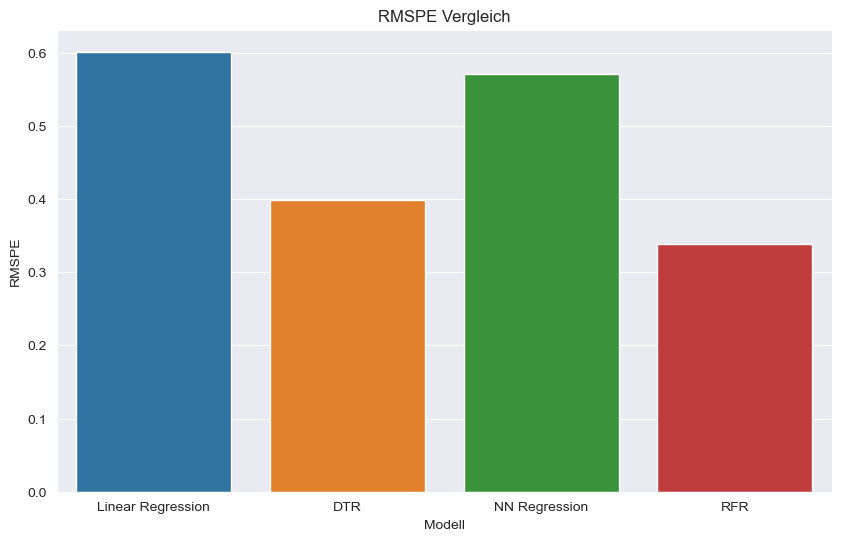

In [57]:
results = {
    "Modell": [],
    "RMSPE": [],
    "MSE": [],
    "R²": []
}

# Iteriere über die Modelle und sammle die Ergebnisse
for model_name, model in dict_models.items():
    mse, r2, rmspe_value = quick_model_testing(model, df_ml)
    results["Modell"].append(model_name)
    results["RMSPE"].append(rmspe_value)
    results["MSE"].append(mse)
    results["R²"].append(r2)

# Daten in ein DataFrame konvertieren
df_results = pd.DataFrame(results)

# Visualisierung der RMSPE-Werte
plt.figure(figsize=(10, 6))
sns.barplot(x="Modell", y="RMSPE", data=df_results)
plt.title("RMSPE Vergleich")
plt.xlabel("Modell")
plt.ylabel("RMSPE")
plt.show()

## Features und Zielvariable

In [58]:
#Relevante Features und Zielvariable
features = [col for col in train_merged_df.columns if col != 'Sales']

X = train_merged_df[features]
y = train_merged_df['Sales']

In [59]:
#Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Regression

In [60]:
#Modell trainieren
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

#Vorhersagen machen
y_pred = dtr.predict(X_val)

In [61]:
# Modell evaluieren
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmspe = rmspe(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"RMSPE: {rmspe}")

Mean Squared Error: 1717646.5157795832
R² Score: 0.8219949117904035
RMSPE: 0.21017751967522683


In [62]:
# Vorhersagen für die Testdaten
X_test = test_merged_df[features]
test_predictions = dtr.predict(X_test)

In [63]:
test_predictions

array([ 4852.,  7537., 10774., ...,  6016., 18529., 10444.])

In [64]:
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Sales': test_predictions})
submission_df.to_csv('submission.csv', index=False)

In [65]:
submission_df

,Id,Sales
0,1,4852.0
1,2,7537.0
2,3,10774.0
3,4,8808.0
4,5,7644.0
...,...,...
41083,41084,2594.0
41084,41085,5837.0
41085,41086,6016.0
41086,41087,18529.0


## Optimieren der Hyperparameter

In [66]:
#Definieren der Hyperparameter Suchräume
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

#Erstellen des GridSearchCV-Objekts
grid_search = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring=make_scorer(mean_squared_error, greater_is_better=False)
)

#Durchführen der Hyperparameter-Optimierung
grid_search.fit(X_train, y_train)

#Beste Hyperparameter ausgeben
print(f"Beste Hyperparameter: {grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/vanjamilanovic/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vanjamilanovic/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vanjamilanovic/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/vanjamilanovic/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate

Beste Hyperparameter: {'max_depth': 40, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [67]:
#Modell mir den besten Hyperparametern trainieren
best_dtr = grid_search.best_estimator_
best_dtr.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=40, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [68]:
#Vorhersagen machen
y_pred = best_dtr.predict(X_val)

In [72]:
#Modell evaluieren
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmspe_score = rmspe(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"RMSPE: {rmspe_score}")

Mean Squared Error: 1325259.288494269
R² Score: 0.862659229136013
RMSPE: 0.17631075359043927


In [74]:
# Vorhersage für die Testdaten nach dem Hyperparameter Tuning
test_predictions = best_dtr.predict(X_test)

# Erstellen des Submission DataFrames
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Sales': test_predictions})

# Speichern der Vorhersagen in einer CSV-Datei
submission_df.to_csv('submission_dtr.csv', index=False)

# Ausgabe der ersten Zeilen des Submission DataFrames
print(submission_df.head())

   Id         Sales
0   1   4345.500000
1   2   7534.222222
2   3  10184.125000
3   4   7972.777778
4   5   7570.428571


Wir prüfen nun, ob unser Modell (DTR) zum Overfitting tendiert. 

In [75]:
#checking overfitting -> trainingsWert vs testWert
# Vorhersagen auf Trainingsdaten
target_train_pred = best_dtr.predict(X_train)

# RMSPE für Trainings- und Testdaten berechnen
rmspe_train = rmspe(y_train, target_train_pred)
rmspe_test = rmspe(y_val, y_pred)

print(f"RMSPE auf Trainingsdaten: {rmspe_train}")
print(f"RMSPE auf Testdaten: {rmspe_test}")

RMSPE auf Trainingsdaten: 0.16593210074338427
RMSPE auf Testdaten: 0.17631075359043927


Die RMSPE der Vorhersagen basierend auf den Trainings- und Testdaten sind nah beieinander. Das ist ein gutes Zeichen dafür, dass unser Modell sowohl auf bekannten (Trainingsdaten) als auch auf unbekannten Daten (Testdaten) gut generalisiert und zuverlässige Vorhersagen trifft.

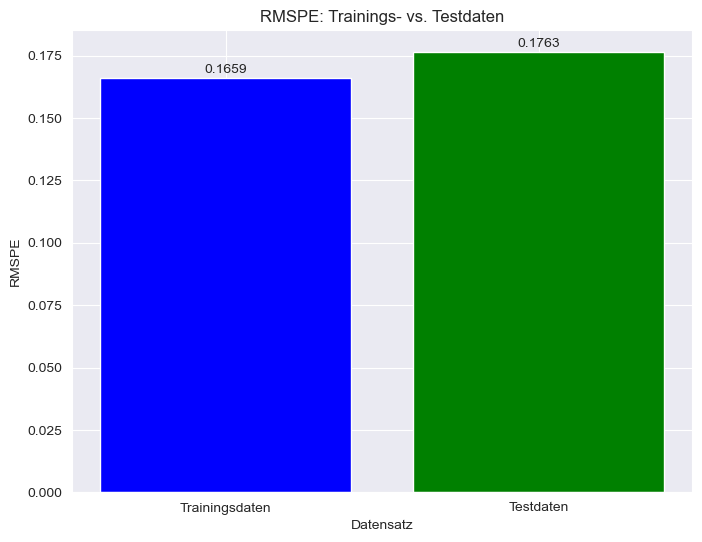

In [76]:
# RMSPE-Werte
rmspe_values = [rmspe_train, rmspe_test]
labels = ['Trainingsdaten', 'Testdaten']

# Balkendiagramm
plt.figure(figsize=(8, 6))
plt.bar(labels, rmspe_values, color=['blue', 'green'])

# Titel und Achsenbeschriftungen
plt.title('RMSPE: Trainings- vs. Testdaten')
plt.ylabel('RMSPE')
plt.xlabel('Datensatz')

# Werte über den Balken anzeigen
for i, v in enumerate(rmspe_values):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom')

# Plot anzeigen
plt.show()

Auch der Scatterplot deutet darauf hin, dass unser Modell gut performt und gleichzeitig nicht overfittet.

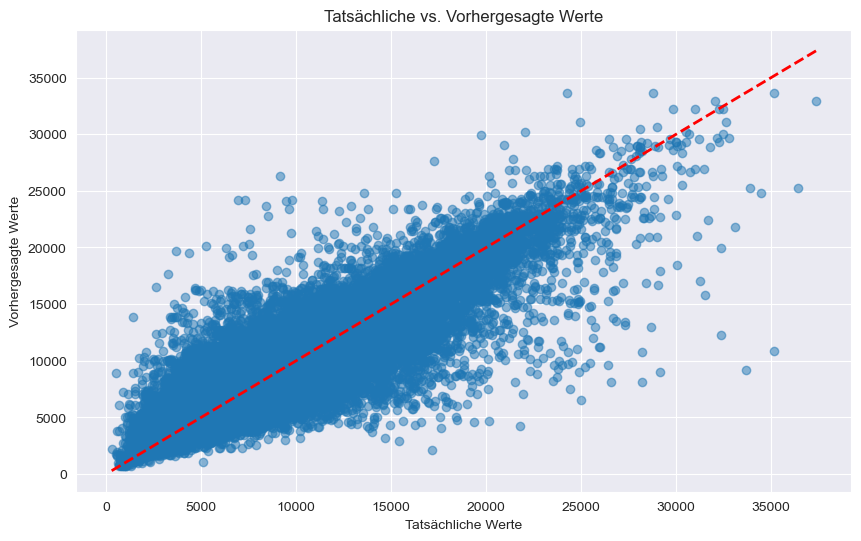

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], "r--", lw=2)
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Tatsächliche vs. Vorhergesagte Werte")
plt.show()

## Random Forest Regression

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer

# Benutzerdefinierten Scorer erstellen (höhere Werte sind schlechter, also verwenden wir "greater_is_better=False")
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Zielvariable (Sales)
target = train_merged_df["Sales"]

# Features (alle Spalten außer 'Sales')
X = train_merged_df.drop(columns=["Sales"])

# Split in Trainings- und Testdaten
X_train, X_test, target_train, target_test = train_test_split(X, target, 
                                                                test_size=0.3, random_state=3)
#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',0.5, 1]
}

# Perform Randomized Search for Random Forest Regressor
rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=rf_params, n_iter=5, cv=5, random_state=42, scoring=rmspe_scorer)

# Fitting the model
rf_random_search.fit(X_train, target_train)

# Vorhersagen auf Testdaten
target_pred = rf_random_search.best_estimator_.predict(X_test)

# Erstellen des Submission DataFrames
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Sales': target_pred})

# Speichern der Vorhersagen in einer CSV-Datei
submission_df.to_csv('submission_rtr.csv', index=False)


# Optional: Ausgabe der besten Parameter nach Randomized Search
print(f"Beste Parameter: {rf_random_search.best_params_}")

# RMSPE je Iteration ausgeben
tuning_result = pd.DataFrame(rf_random_search.cv_results_)
rmspe_per_iteration = tuning_result[["mean_test_score", "std_test_score", "params"]]
print(rmspe_per_iteration)

#Quellen:
#https://www.kaggle.com/code/nargisbegum82/hyperparameter-tuning-in-random-forests


Beste Parameter: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': None}
   mean_test_score  std_test_score  \
0        -0.318425        0.038478   
1        -0.248373        0.056299   
2        -0.258939        0.063122   
3        -0.318859        0.039747   
4        -0.220166        0.075274   

                                              params  
0  {'n_estimators': 20, 'min_samples_split': 5, '...  
1  {'n_estimators': 20, 'min_samples_split': 5, '...  
2  {'n_estimators': 20, 'min_samples_split': 2, '...  
3  {'n_estimators': 50, 'min_samples_split': 10, ...  
4  {'n_estimators': 100, 'min_samples_split': 10,...  


Wir prüfen nun, ob unser Modell zum Overfitting tendiert. 

In [71]:
#checking overfitting -> trainingsWert vs testWert
# Vorhersagen auf Trainingsdaten
target_train_pred = rf_random_search.best_estimator_.predict(X_train)

# RMSPE für Trainings- und Testdaten berechnen
rmspe_train = rmspe(target_train, target_train_pred)
rmspe_test = rmspe(target_test, target_pred)

print(f"RMSPE auf Trainingsdaten: {rmspe_train}")
print(f"RMSPE auf Testdaten: {rmspe_test}")

RMSPE auf Trainingsdaten: 0.1774197475172629
RMSPE auf Testdaten: 0.15294018716997826


Die RMSPE der Vorhersagen basierend auf den Trainings- und Testdaten sind nah beieinander. Das ist ein gutes Zeichen dafür, dass unser Modell sowohl auf bekannten (Trainingsdaten) als auch auf unbekannten Daten (Testdaten) gut generalisiert und zuverlässige Vorhersagen trifft.

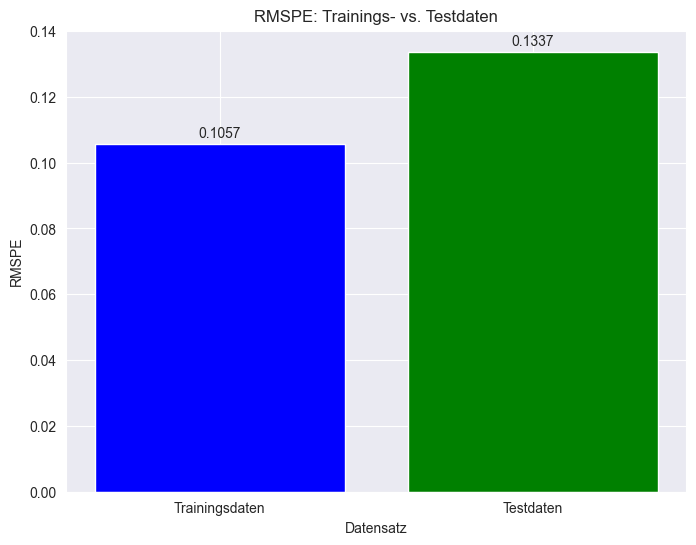

In [63]:
# RMSPE-Werte
rmspe_values = [rmspe_train, rmspe_test]
labels = ['Trainingsdaten', 'Testdaten']

# Balkendiagramm
plt.figure(figsize=(8, 6))
plt.bar(labels, rmspe_values, color=['blue', 'green'])

# Titel und Achsenbeschriftungen
plt.title('RMSPE: Trainings- vs. Testdaten')
plt.ylabel('RMSPE')
plt.xlabel('Datensatz')

# Werte über den Balken anzeigen
for i, v in enumerate(rmspe_values):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom')

# Plot anzeigen
plt.show()

Auch der Scatterplot deutet darauf hin, dass unser Modell gut performt und gleichzeitig nicht overfittet.

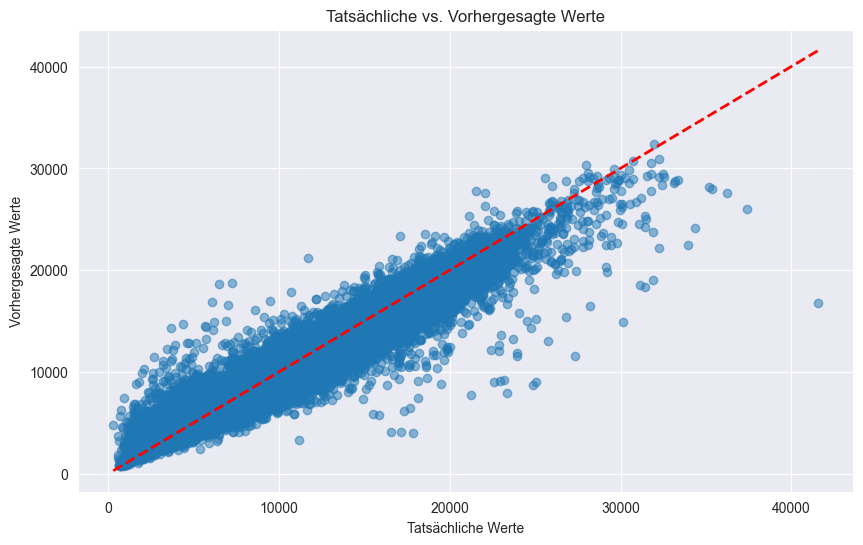

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(target_test, target_pred, alpha=0.5)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], "r--", lw=2)
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Tatsächliche vs. Vorhergesagte Werte")
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_random_search.best_estimator_, X_train, target_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "o-", label="Training Score")
plt.plot(train_sizes, test_mean, "o-", label="Validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()
 

#### Feature Selection

Durch die Methode "feature_importances_" können wir uns ausgeben, welche Merkmale am einflussreichsten bzw. relevantesten für das Modell waren.

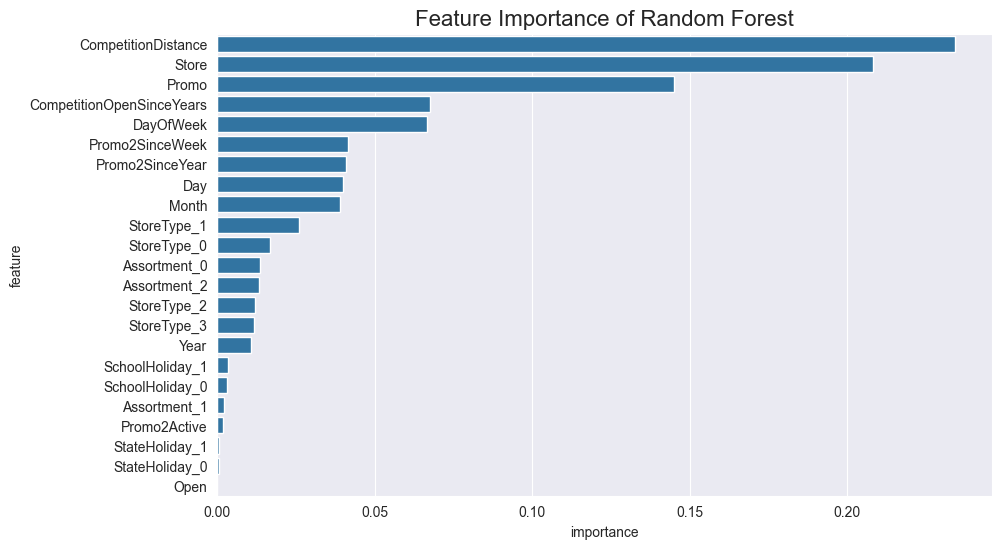

In [72]:
feature_importance_rf_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_random_search.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))  # Optional: Setzt die Größe des Plots
ax = sns.barplot(data=feature_importance_rf_df, x='importance', y='feature')

# Titel hinzufügen
ax.set_title('Feature Importance of Random Forest', fontsize=16)

# Plot anzeigen
plt.show()

Um eine Entscheidung darüber zu treffen, welche Features möglicherweise irrelevant oder wenig hilfreich für das Modell sind, kann ein Random Feature (ein zufällig generiertes Merkmal ohne Informationsgehalt) in den Datensatz eingefügt werden. Dies ermöglicht es, die Bedeutung der tatsächlichen Features im Verhältnis zu einem vollständig zufälligen Merkmal zu bewerten.

Die Idee hinter diesem Ansatz ist es, ein Feature zu schaffen, das garantiert keinen Informationsgehalt besitzt. Dadurch lässt sich herausfinden, ob eines der existierenden Features in Wirklichkeit keinen relevanten Einfluss auf das Training des Modells hat, indem es in seiner Wichtigkeit nicht signifikant über dem zufälligen Feature liegt.

In [73]:

X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = rf_random_search.best_estimator_
rf_random.fit(X_train_random, target_train)

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
#Quelle: https://forecastegy.com/posts/feature-importance-in-random-forests/

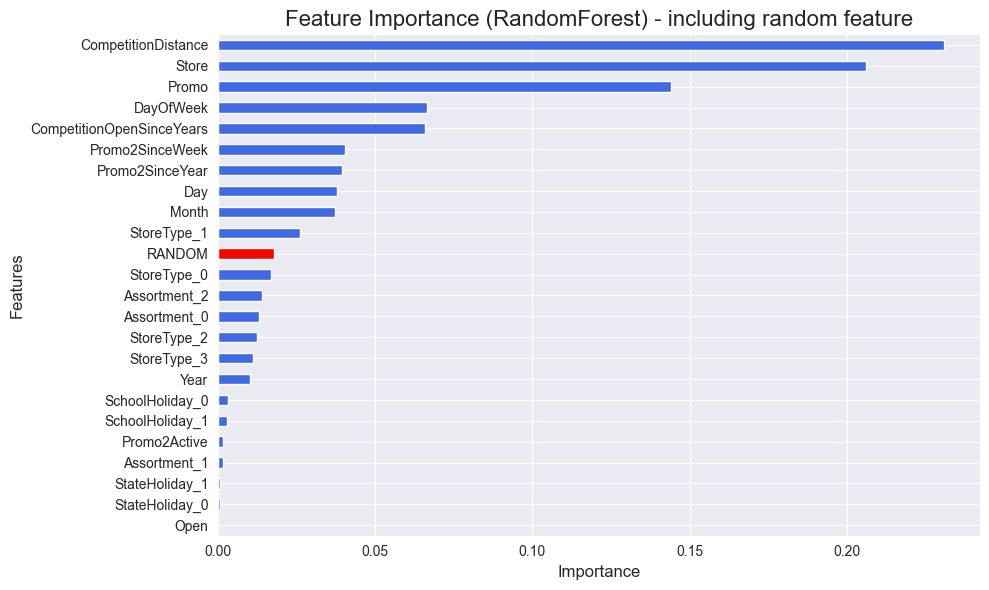

In [74]:
# Farben definieren: Rot für das "RANDOM"-Feature, Blau für die anderen
colors = ['red' if feature == 'RANDOM' else 'royalblue' for feature in global_importances_random.index]

# Plot
plt.figure(figsize=(10, 6))
global_importances_random.plot(kind='barh', color=colors)

# Titel und Beschriftungen hinzufügen
plt.title("Feature Importance (RandomForest) - including random feature", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Anzeigen
plt.tight_layout()
plt.show()

Jedes Feature, dessen Wichtigkeit unter oder nahe der des zufälligen Features liegt, ist potenziell irrelevant für das Modell. Diese Features könnten entfernt werden, um das Modell zu vereinfachen, ohne die Vorhersagegenauigkeit zu verschlechtern.w

## Zusammenfassung / Vergleich der Modellergebnisse
Als Verfahren für die Messung der Güte der Modelle wurde der RMSPE verwendet. 
Der RMSPE bei der  Decision Tree Regression liegt bei 0,1763 und bei der Random Forest Regression bei 0,1337. Beide Werte liegen in einem sehr guten Bereich und deuten darauf hin, dass die Modelle zuverlässige Vorhersagen treffen.

# Quellenverzeichnis
- Géron, Aurélien (2019): Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow : Concepts, Tools, and Techniques to Build Intelligent Systems. Sebastopol, UNITED STATES: O’Reilly Media, Incorporated. Online verfügbar unter http://ebookcentral.proquest.com/lib/htw-berlin/detail.action?docID=5892320.
- GitHub (2024): handson-ml/ml-project-checklist.md at master · ageron/handson-ml. Online verfügbar unter https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md, zuletzt aktualisiert am 23.06.2024, zuletzt geprüft am 23.06.2024.
- Merge, join, concatenate and compare — pandas 2.2.2 documentation (2024). Online verfügbar unter https://pandas.pydata.org/docs/user_guide/merging.html, zuletzt aktualisiert am 11.04.2024, zuletzt geprüft am 23.06.2024.
- Rossmann Store Sales (2024). Online verfügbar unter https://www.kaggle.com/competitions/rossmann-store-sales/overview, zuletzt aktualisiert am 23.06.2024, zuletzt geprüft am 23.06.2024.
- Rossmann Store Sales (2024). Online verfügbar unter https://www.kaggle.com/code/mustiztemiz/predict-rossman-store-sales, zuletzt aktualisiert am 21.09.2024, zuletzt geprüft am 21.09.2024.
- https://scikit-learn.org/stable/modules/impute.html#
- https://link.springer.com/article/10.1023/A:1010933404324
- https://scikit-learn.org/stable/modules/ensemble.html#forest